# Prediction of RainFall Using Linear Neural Network

## Data preparation

In [1]:

import torch
import numpy as np
import pandas as pd


data = pd.read_csv('data/weather.csv')
data = data.dropna()
data.head()
#inputs = torch.from_numpy(inputs)
#targets = torch.from_numpy(targets)

#inputs = torch.tensor(inputs, dtype=torch.float32)
#targets = torch.tensor(targets, dtype=torch.float32)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


### `Exclude columns with text information like SW`

In [2]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [3]:
data.drop(['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','RainToday', 'RISK_MM', 'RainTomorrow'], axis = 1, inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,8.0,24.3,0.0,3.4,6.3,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6
1,14.0,26.9,3.6,4.4,9.7,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7
2,13.7,23.4,3.6,5.8,3.3,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2
3,13.3,15.5,39.8,7.2,9.1,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1
4,7.6,16.1,2.8,5.6,10.6,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4


### Change dataframe to Tensor

In [4]:
targets = torch.FloatTensor(data.Rainfall.values)
data.drop('Rainfall', axis=1, inplace=True)
inputs = torch.FloatTensor(data.values)

targets_train = targets[:300]
targets_test = targets[300:]

inputs_train = inputs[:300]
inputs_test = inputs[300:]
print(inputs_train.shape, targets_train.shape, inputs_test.shape, targets_test.shape)

torch.Size([300, 14]) torch.Size([300]) torch.Size([28, 14]) torch.Size([28])


## Dataset

In [5]:
from torch.utils.data import TensorDataset

dataset_train = TensorDataset(inputs_train, targets_train) #tuple of inputs and targets
dataset_test = TensorDataset(inputs_test, targets_test) #tuple of inputs and targets

## Dataloading

In [6]:
from torch.utils.data import DataLoader

batch_size = 300
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset_train, batch_size=28, shuffle=True, drop_last=False)

# Batch Sampling
for input,target in train_loader:
    print(input.shape, target.shape)


torch.Size([300, 14]) torch.Size([300])


## Design a neural network

In [7]:
# Linear Regression Model
from torch import nn
class linearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = nn.BatchNorm1d(14)
        self.linear = nn.Linear(14, 1)  # input and output is 1 dimension
    def forward(self, x):
        x = self.norm(x)
        out = self.linear(x)
        return out

model = linearRegression()

## Training

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

num_epochs = 2000
for epoch in range(num_epochs):    
    for input, target in train_loader:
        optimizer.zero_grad()
        pred = model(input)
        loss = criterion(pred, target)
        loss.backward()
        optimizer.step()
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')



#for name, param in model.named_parameters():
#    print (name, param.data.numpy(), end=' ')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([300])) that is different to the input size (torch.Size([300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch[1/2000], loss: 21.441345
Epoch[2/2000], loss: 21.440369
Epoch[3/2000], loss: 21.439398
Epoch[4/2000], loss: 21.438429
Epoch[5/2000], loss: 21.437462
Epoch[6/2000], loss: 21.436497
Epoch[7/2000], loss: 21.435530
Epoch[8/2000], loss: 21.434561
Epoch[9/2000], loss: 21.433598
Epoch[10/2000], loss: 21.432631
Epoch[11/2000], loss: 21.431664
Epoch[12/2000], loss: 21.430702
Epoch[13/2000], loss: 21.429739
Epoch[14/2000], loss: 21.428776
Epoch[15/2000], loss: 21.427814
Epoch[16/2000], loss: 21.426851
Epoch[17/2000], loss: 21.425888
Epoch[18/2000], loss: 21.424929
Epoch[19/2000], loss: 21.423971
Epoch[20/2000], loss: 21.423018
Epoch[21/2000], loss: 21.422056
Epoch[22/2000], loss: 21.421099
Epoch[23/2000], loss: 21.420141
Epoch[24/2000], loss: 21.419186
Epoch[25/2000], loss: 21.418224
Epoch[26/2000], loss: 21.417274
Epoch[27/2000], loss: 21.416323
Epoch[28/2000], loss: 21.415371
Epoch[29/2000], loss: 21.414417
Epoch[30/2000], loss: 21.413467
Epoch[31/2000], loss: 21.412514
Epoch[32/2000], l

## Evaluation

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


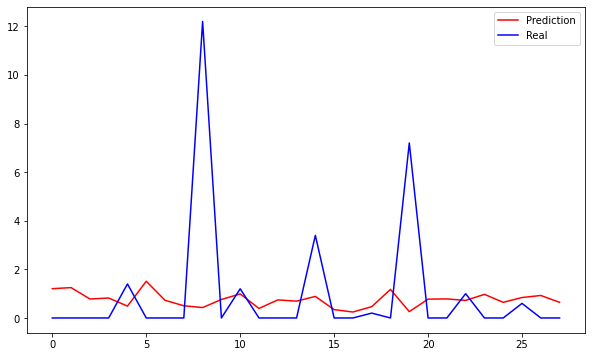

In [9]:
import matplotlib.pyplot as plt

model.eval()

input, target = next(iter(test_loader))

pred = model(input)
loss = criterion(pred, target)
#print("Prediction: \n",pred.data)
#print("Real:", target.data)

plt.figure(figsize = (10,6))
plt.plot(pred.data,'r-', label='Prediction')
plt.plot(target.data,'b-', label='Real')
plt.legend()
plt.show()

# It rains today?

In [10]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

data = pd.read_csv('data/weather.csv')
data = data.dropna()
data.drop(['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','RISK_MM','RainTomorrow'], axis = 1, inplace=True)

data['RainToday'] = data['RainToday'].apply(lambda x: 0 if x=='No' else 1)

targets = torch.FloatTensor(data['RainToday'].values)
data.drop('RainToday', axis=1, inplace=True)
inputs = torch.FloatTensor(data.values)

targets_train = targets[:300]
targets_test = targets[300:]

inputs_train = inputs[:300]
inputs_test = inputs[300:]


dataset_train = TensorDataset(inputs_train, targets_train) #tuple of inputs and targets
dataset_test = TensorDataset(inputs_test, targets_test) #tuple of inputs and targets
batch_size = 300
train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset_train, batch_size=28, shuffle=True)



model = nn.Linear(15,1)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

num_epochs = 10000
for epoch in range(num_epochs):    
    for input, target in train_loader:
        optimizer.zero_grad()
        pred = model(input)
        target = target.unsqueeze(1)
        loss = criterion(pred, target)
        loss.backward()
        optimizer.step()
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

Epoch[1/10000], loss: 118.371170
Epoch[2/10000], loss: 3.991912
Epoch[3/10000], loss: 15.069880
Epoch[4/10000], loss: 28.626537
Epoch[5/10000], loss: 20.910088
Epoch[6/10000], loss: 13.193642
Epoch[7/10000], loss: 5.477194
Epoch[8/10000], loss: 8.822119
Epoch[9/10000], loss: 30.099623
Epoch[10/10000], loss: 22.383173
Epoch[11/10000], loss: 14.666725
Epoch[12/10000], loss: 6.950278
Epoch[13/10000], loss: 2.797224
Epoch[14/10000], loss: 27.143261
Epoch[15/10000], loss: 19.426811
Epoch[16/10000], loss: 11.710363
Epoch[17/10000], loss: 3.993915
Epoch[18/10000], loss: 15.000175
Epoch[19/10000], loss: 28.628542
Epoch[20/10000], loss: 20.912094
Epoch[21/10000], loss: 13.195649
Epoch[22/10000], loss: 5.479200
Epoch[23/10000], loss: 8.752416
Epoch[24/10000], loss: 30.100784
Epoch[25/10000], loss: 22.384338
Epoch[26/10000], loss: 14.667891
Epoch[27/10000], loss: 6.951444
Epoch[28/10000], loss: 2.737341
Epoch[29/10000], loss: 27.003523
Epoch[30/10000], loss: 19.287077
Epoch[31/10000], loss: 11.57

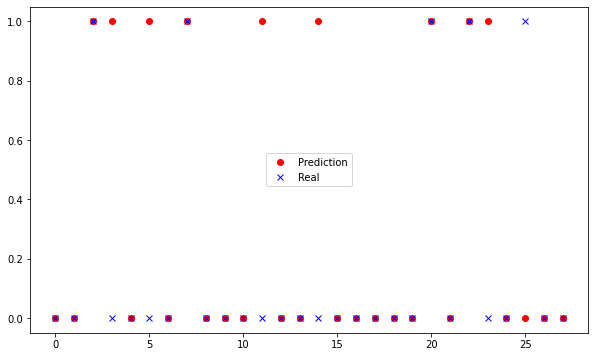

tensor([[ 0,  0],
        [ 1,  0],
        [ 2,  0],
        [ 4,  0],
        [ 6,  0],
        [ 7,  0],
        [ 8,  0],
        [ 9,  0],
        [10,  0],
        [12,  0],
        [13,  0],
        [15,  0],
        [16,  0],
        [17,  0],
        [18,  0],
        [19,  0],
        [20,  0],
        [21,  0],
        [22,  0],
        [24,  0],
        [26,  0],
        [27,  0]])

In [11]:
import matplotlib.pyplot as plt


model.eval()
input, target = next(iter(test_loader))
pred = model(input)
pred = torch.sigmoid(pred)
pred = torch.where(pred > 0.5, 1, 0)
target = target.unsqueeze(1)

plt.figure(figsize = (10,6))
plt.plot(pred.data,'ro', label='Prediction')
plt.plot(target.data,'bx', label='Real')
plt.legend()
plt.show()

torch.argwhere(pred.data == target.data)

# `Lab: Predict if it will rain tomorrow`